In [1]:
%reload_ext autoreload
%autoreload 2

#### 0. Pick the data to be factual("Risk"=1)

In [360]:
from test_dataset.german_credit import GermanCreditDataset
dataset = GermanCreditDataset()
df = dataset.get_dataframe()
df.head(3)

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,1,1169,6,5,0
1,22,0,2,1,1,2,5951,48,5,1
2,49,1,1,1,1,0,2096,12,3,0


In [361]:
df_Risk_1 = df[df['Risk'] == 1]
df_Risk_1 = df_Risk_1.sample(30)
df_Risk_1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
639,26,1,2,1,1,1,4370,42,5,1
700,29,0,1,2,3,0,1123,12,4,1
814,46,1,2,0,1,1,3931,48,1,1
652,45,1,2,1,1,1,2303,24,1,1
364,25,1,0,1,1,1,2473,18,4,1


In [362]:
df_without_target = df_Risk_1.drop(columns=['Risk']).copy()
df_without_target.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
639,26,1,2,1,1,1,4370,42,5
700,29,0,1,2,3,0,1123,12,4
814,46,1,2,0,1,1,3931,48,1
652,45,1,2,1,1,1,2303,24,1
364,25,1,0,1,1,1,2473,18,4


In [363]:
feature_names = df_without_target.columns
feature_names

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [3]:
########### Hotel booking dataset
from test_dataset import HotelBookingsDataset
dataset_hotel = HotelBookingsDataset()
df_heloc = dataset_hotel.get_dataframe()
df_heloc.head(3)
df_Risk_2 = df_heloc[df_heloc['is_canceled'] == 1]
df_Risk_2 = df_Risk_2.sample(40)
df_Risk_2.head()
df_without_target_2 = df_Risk_2.drop(columns=['is_canceled']).copy()
df_without_target_2.head()
feature_names_2 = df_without_target_2.columns
feature_names_2

d:\Github-desktop\COLA\test_dataset\hotel_bookings.py:123: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[column].fillna(median_val, inplace=True)


Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

#### 1. Initialize data interface

In [364]:
from xai_cola import data_interface 
data1 = data_interface.PandasData(df_without_target, target_name='Risk')

In [4]:
#########################
from xai_cola import data_interface
data2 = data_interface.PandasData(df_without_target_2, target_name='is_canceled')

#### 2. Initialize model interface

In [365]:
import joblib
lgbmcClassifier = joblib.load('lgbm_GremanCredit.pkl')
print(f'----lgbm_GremanCredit.pkl model has been loaded----')

----lgbm_GremanCredit.pkl model has been loaded----


In [5]:
######################################
import joblib
lgbmcClassifier_2 = joblib.load('lgbm_HotelBooking.pkl')
print(f'----lgbm_HotelBooking.pkl model has been loaded----')

----lgbm_HotelBooking.pkl model has been loaded----


In [366]:
from xai_cola import ml_model_interface
ml_model1 = ml_model_interface.Model(model=lgbmcClassifier, backend="sklearn")

In [6]:
###################################
from xai_cola import ml_model_interface
ml_model2 = ml_model_interface.Model(model=lgbmcClassifier_2, backend="sklearn")

#### 3.Choose the CounterfactualExplanation Algorithm

In [367]:
from counterfactual_explainer import DiCE,DisCount
explainer = DiCE(ml_model=ml_model1)
explainer_discount = DisCount(ml_model=ml_model1)

In [7]:
#########################################
from counterfactual_explainer import DiCE,DisCount
explainer_2 = DiCE(ml_model=ml_model2)
explainer_discount_2 = DisCount(ml_model=ml_model2)

In [368]:
factual, counterfactual = explainer.generate_counterfactuals(data=data1,
                                                             factual_class=1,
                                                             total_cfs=1,
                                                             features_to_keep=['Age','Sex'])
print(f'Factual: {factual}')
print(f'Counterfactual: {counterfactual}')

100%|██████████| 30/30 [00:02<00:00, 10.82it/s]

Factual: [[   26     1     2     1     1     1  4370    42     5]
 [   29     0     1     2     3     0  1123    12     4]
 [   46     1     2     0     1     1  3931    48     1]
 [   45     1     2     1     1     1  2303    24     1]
 [   25     1     0     1     1     1  2473    18     4]
 [   26     1     2     1     1     3  4210    36     5]
 [   30     1     3     1     2     2  1919    30     5]
 [   31     1     2     1     0     1  6350    30     4]
 [   28     1     2     2     1     1  6199    12     5]
 [   28     1     1     1     1     1   654     9     1]
 [   55     0     0     0     1     1  1190    18     6]
 [   42     1     2     1     1     1  3446    36     4]
 [   36     1     1     1     1     2  4241    24     0]
 [   42     1     2     1     1     1  4153    18     4]
 [   39     1     3     1     1     0  6458    18     1]
 [   24     0     1     1     1     1  1228    12     1]
 [   34     0     2     1     1     1  1842    36     1]
 [   31     1     2   

In [369]:
from xai_cola.cola_policy.matching import CounterfactualExactMatchingPolicy

type(CounterfactualExactMatchingPolicy(factual, counterfactual).compute_prob_matrix_of_factual_and_counterfactual())

numpy.ndarray

In [59]:
######################################################
factual_2, counterfactual_2 = explainer_2.generate_counterfactuals(data=data2,
                                                             factual_class=1,
                                                             total_cfs=1)
print(f'Factual: {factual_2}')
print(f'Counterfactual: {counterfactual_2}')

100%|██████████| 40/40 [00:04<00:00,  8.99it/s]

Factual: [[0.000e+00 1.050e+02 2.017e+03 ... 1.350e+02 0.000e+00 0.000e+00]
 [0.000e+00 2.760e+02 2.015e+03 ... 6.200e+01 0.000e+00 0.000e+00]
 [1.000e+00 1.530e+02 2.017e+03 ... 2.130e+02 0.000e+00 0.000e+00]
 ...
 [0.000e+00 2.180e+02 2.017e+03 ... 1.071e+02 0.000e+00 0.000e+00]
 [1.000e+00 2.400e+01 2.016e+03 ... 4.800e+01 0.000e+00 1.000e+00]
 [0.000e+00 3.370e+02 2.016e+03 ... 6.200e+01 0.000e+00 0.000e+00]]
Counterfactual: [[0.000e+00 1.050e+02 2.017e+03 ... 1.350e+02 0.000e+00 0.000e+00]
 [0.000e+00 2.760e+02 2.015e+03 ... 6.200e+01 0.000e+00 3.000e+00]
 [1.000e+00 1.530e+02 2.017e+03 ... 2.130e+02 0.000e+00 0.000e+00]
 ...
 [0.000e+00 2.180e+02 2.017e+03 ... 1.071e+02 0.000e+00 0.000e+00]
 [1.000e+00 2.400e+01 2.016e+03 ... 4.800e+01 0.000e+00 1.000e+00]
 [0.000e+00 3.370e+02 2.016e+03 ... 6.200e+01 0.000e+00 0.000e+00]]


#### 4. Choose policy and make limitation

In [370]:
from xai_cola.counterfactual_limited_actions import COLA
refiner = COLA(
    data=data1,
    ml_model=ml_model1,
    x_factual=factual,
    x_counterfactual=counterfactual,
)
refiner.set_policy(
    matcher="ect",
    attributor="pshap",
    Avalues_method="max"
    )

You choose the Policy: pshap With Exact Matching, Avalues_method is max


In [60]:
########################################################
from xai_cola.counterfactual_limited_actions import COLA
refiner_2 = COLA(
    data=data2,
    ml_model=ml_model2,
    x_factual=factual_2,
    x_counterfactual=counterfactual_2,
)
refiner_2.set_policy(
    matcher="ect",
    attributor="pshap",
    Avalues_method="max"
    )

You choose the Policy: pshap With Exact Matching, Avalues_method is max


In [16]:
factual, ce, ace = refiner.get_refined_counterfactual(limited_actions=20)

NameError: name 'refiner' is not defined

In [61]:
##########################################################
factual_2, ce_2, ace_2 = refiner_2.get_refined_counterfactual(limited_actions=30)

Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.        0.3375954]
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.79323879 0.06945458]
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.33856409 0.63895889]
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.41879942 0.26309368]
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray su

In [41]:
corresponding_counterfactual_2 =refiner_2.corresponding_counterfactual_dataframe

#### 5.Highlight the generated counterfactuals

In [372]:
refine_factual, refine_ce, refine_ace = refiner.highlight_changes()

changes from factual to counterfactual


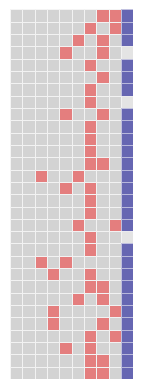

changes from factual to actionlimited_counterfactuals


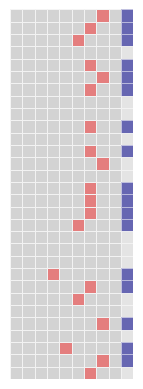

(None, None)

In [394]:
refiner.heatmap()

In [62]:
##########################################################
refine_factual_2, refine_ce_2, refine_ace_2 = refiner_2.highlight_changes()

In [ ]:
refiner._get_matcher()

In [63]:
#################################################
refiner_2._get_matcher()

array([[2.5e-02, 1.0e-20, 1.0e-20, ..., 1.0e-20, 1.0e-20, 1.0e-20],
       [1.0e-20, 2.5e-02, 1.0e-20, ..., 1.0e-20, 1.0e-20, 1.0e-20],
       [1.0e-20, 1.0e-20, 2.5e-02, ..., 1.0e-20, 1.0e-20, 1.0e-20],
       ...,
       [1.0e-20, 1.0e-20, 1.0e-20, ..., 2.5e-02, 1.0e-20, 1.0e-20],
       [1.0e-20, 1.0e-20, 1.0e-20, ..., 1.0e-20, 2.5e-02, 1.0e-20],
       [1.0e-20, 1.0e-20, 1.0e-20, ..., 1.0e-20, 1.0e-20, 2.5e-02]])

changes from factual to counterfactual


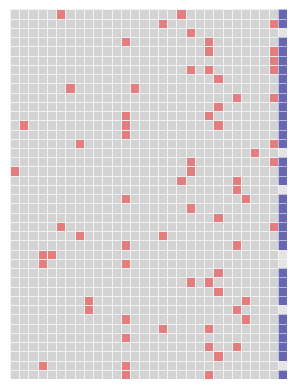

changes from factual to actionlimited_counterfactuals


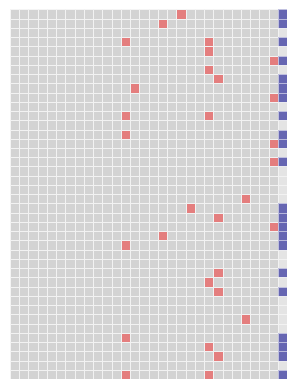

(None, None)

In [64]:
#################################################
refiner_2.heatmap()

In [374]:
print("factual")
display(factual)
print("factaul -> corresponding counterfactual")
display(refine_ce)
print("factual -> action-limited counterfactual")
display(refine_ace)

factual


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,26,1,2,1,1,1,4370,42,5,1
1,29,0,1,2,3,0,1123,12,4,1
2,46,1,2,0,1,1,3931,48,1,1
3,45,1,2,1,1,1,2303,24,1,0
4,25,1,0,1,1,1,2473,18,4,1
5,26,1,2,1,1,3,4210,36,5,1
6,30,1,3,1,2,2,1919,30,5,1
7,31,1,2,1,0,1,6350,30,4,0
8,28,1,2,2,1,1,6199,12,5,1
9,28,1,1,1,1,1,654,9,1,1


factaul -> corresponding counterfactual


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,26,1,2,1,1,1,4370,42 -> 22,5 -> 3,1 -> 0
1,29,0,1,2,3,0,1123 -> 2713,12,4 -> 7,1 -> 0
2,46,1,2,0,1,1 -> 0,3931,48 -> 26,1,1 -> 0
3,45,1,2,1,1 -> 3,1,2303,24 -> 13,1,0
4,25,1,0,1,1,1,2473 -> 6382,18,4,1 -> 0
5,26,1,2,1,1,3,4210,36 -> 11,5,1 -> 0
6,30,1,3,1,2,2,1919 -> 9818,30,5,1 -> 0
7,31,1,2,1,0,1,6350 -> 12909,30,4,0
8,28,1,2,2,1 -> 2,1,6199,12 -> 24,5,1 -> 0
9,28,1,1,1,1,1,654 -> 1810,9,1,1 -> 0


factual -> action-limited counterfactual


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,26,1,2,1,1,1,4370,42 -> 22,5,1 -> 0
1,29,0,1,2,3,0,1123 -> 2713,12,4,1 -> 0
2,46,1,2,0,1,1 -> 0,3931,48,1,1 -> 0
3,45,1,2,1,1,1,2303,24,1,0
4,25,1,0,1,1,1,2473 -> 6382,18,4,1 -> 0
5,26,1,2,1,1,3,4210,36 -> 11,5,1 -> 0
6,30,1,3,1,2,2,1919 -> 9818,30,5,1 -> 0
7,31,1,2,1,0,1,6350,30,4,0
8,28,1,2,2,1,1,6199,12,5,1
9,28,1,1,1,1,1,654 -> 1810,9,1,1 -> 0


In [68]:
###############################################
print("factual")
display(refine_factual_2)
print("factaul -> corresponding counterfactual")
display(refine_ce_2)
print("factual -> action-limited counterfactual")
display(refine_ace_2)


factual


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
0,0.0,105.0,2017.0,8.0,19.0,13.0,1.0,1.0,2.0,0.0,...,0.0,0.0,9.0,179.0,0.0,2.0,135.0,0.0,0.0,1
1,0.0,276.0,2015.0,5.0,30.0,20.0,1.0,1.0,2.0,0.0,...,0.0,0.0,1.0,179.0,0.0,0.0,62.0,0.0,0.0,1
2,1.0,153.0,2017.0,5.0,30.0,24.0,1.0,2.0,2.0,0.0,...,0.0,0.0,240.0,179.0,0.0,3.0,213.0,0.0,0.0,0
3,0.0,162.0,2017.0,1.0,33.0,19.0,1.0,1.0,2.0,0.0,...,0.0,1.0,14.0,179.0,0.0,2.0,140.0,0.0,0.0,1
4,0.0,443.0,2016.0,0.0,18.0,29.0,0.0,1.0,2.0,0.0,...,0.0,1.0,3.0,179.0,0.0,2.0,65.0,0.0,0.0,1
5,0.0,59.0,2016.0,7.0,12.0,17.0,0.0,3.0,2.0,0.0,...,0.0,0.0,7.0,179.0,0.0,2.0,77.85,0.0,0.0,1
6,0.0,510.0,2016.0,2.0,49.0,1.0,0.0,2.0,2.0,0.0,...,0.0,1.0,1.0,179.0,0.0,2.0,62.8,0.0,0.0,1
7,0.0,171.0,2016.0,1.0,35.0,22.0,1.0,1.0,3.0,0.0,...,0.0,0.0,9.0,179.0,0.0,2.0,137.7,0.0,0.0,1
8,0.0,253.0,2017.0,4.0,2.0,14.0,2.0,1.0,2.0,0.0,...,0.0,0.0,9.0,179.0,0.0,2.0,129.6,0.0,0.0,1
9,1.0,72.0,2016.0,3.0,6.0,6.0,2.0,1.0,2.0,0.0,...,0.0,0.0,14.0,179.0,0.0,3.0,73.33,0.0,0.0,1


factaul -> corresponding counterfactual


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
0,0.000000,105.000000,2017.000000,8.000000,19.000000,13.0 -> 11.0,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,135.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.0 -> 3.0,0.000000,0.000000,0.000000,9.000000,179.000000,0.000000,2.000000,135.000000,0.000000,0.000000,1 -> 0
1,0.000000,276.000000,2015.000000,5.000000,30.000000,20.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,135.000000,4.000000,3.000000,0.000000,1.0 -> 0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,179.000000,0.000000,0.000000,62.000000,0.000000,0.0 -> 3.0,1 -> 0
2,1.000000,153.000000,2017.000000,5.000000,30.000000,24.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,25.000000,6.000000,3.000000,0.000000,0.000000,0.000000,4.000000,4.0 -> 6.0,0.000000,0.000000,240.000000,179.000000,0.000000,3.000000,213.000000,0.000000,0.000000,0
3,0.000000,162.000000,2017.000000,1.000000,33.000000,19.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,135.0 -> 39.0,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0 -> 0.0,14.000000,179.000000,0.000000,2.000000,140.000000,0.000000,0.000000,1 -> 0
4,0.000000,443.000000,2016.000000,0.000000,18.000000,29.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,135.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0 -> 0.0,3.000000,179.000000,0.000000,2.000000,65.000000,0.000000,0.0 -> 3.0,1 -> 0
5,0.000000,59.000000,2016.000000,7.000000,12.000000,17.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,135.000000,6.000000,3.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,7.000000,179.000000,0.000000,2.000000,77.850000,0.000000,0.0 -> 1.0,1 -> 0
6,0.000000,510.000000,2016.000000,2.000000,49.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,135.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0 -> 6.0,0.000000,1.0 -> 0.0,1.000000,179.000000,0.000000,2.000000,62.800000,0.000000,0.0 -> 3.0,1 -> 0
7,0.000000,171.000000,2016.000000,1.000000,35.000000,22.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,80.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.0 -> 346.6,179.000000,0.000000,2.000000,137.700000,0.000000,0.000000,1 -> 0
8,0.000000,253.000000,2017.000000,4.000000,2.000000,14.000000,2.0 -> 1.0,1.000000,2.000000,0.000000,0.000000,2.000000,81.000000,6.0 -> 4.0,3.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,9.000000,179.000000,0.000000,2.000000,129.600000,0.000000,0.000000,1 -> 0
9,1.000000,72.000000,2016.000000,3.000000,6.000000,6.000000,2.000000,1.000000,2.000000,0.000000,0.000000,2.000000,135.000000,4.000000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,14.000000,179.000000,0.0 -> 46.0,3.000000,73.330000,0.000000,0.0 -> 2.0,1 -> 0


factual -> action-limited counterfactual


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
0,0.000000,105.000000,2017.000000,8.000000,19.000000,13.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,135.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.0 -> 3.0,0.000000,0.000000,0.000000,9.000000,179.000000,0.000000,2.000000,135.000000,0.000000,0.000000,1 -> 0
1,0.000000,276.000000,2015.000000,5.000000,30.000000,20.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,135.000000,4.000000,3.000000,0.000000,1.0 -> 0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,179.000000,0.000000,0.000000,62.000000,0.000000,0.000000,1 -> 0
2,1.000000,153.000000,2017.000000,5.000000,30.000000,24.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,25.000000,6.000000,3.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,240.000000,179.000000,0.000000,3.000000,213.000000,0.000000,0.000000,0
3,0.000000,162.000000,2017.000000,1.000000,33.000000,19.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,135.0 -> 39.0,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0 -> 0.0,14.000000,179.000000,0.000000,2.000000,140.000000,0.000000,0.000000,1 -> 0
4,0.000000,443.000000,2016.000000,0.000000,18.000000,29.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,135.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0 -> 0.0,3.000000,179.000000,0.000000,2.000000,65.000000,0.000000,0.000000,1
5,0.000000,59.000000,2016.000000,7.000000,12.000000,17.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,135.000000,6.000000,3.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,7.000000,179.000000,0.000000,2.000000,77.850000,0.000000,0.0 -> 1.0,1 -> 0
6,0.000000,510.000000,2016.000000,2.000000,49.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,135.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0 -> 0.0,1.000000,179.000000,0.000000,2.000000,62.800000,0.000000,0.000000,1
7,0.000000,171.000000,2016.000000,1.000000,35.000000,22.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,80.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.0 -> 346.6,179.000000,0.000000,2.000000,137.700000,0.000000,0.000000,1 -> 0
8,0.000000,253.000000,2017.000000,4.000000,2.000000,14.000000,2.000000,1.000000,2.000000,0.000000,0.000000,2.000000,81.000000,6.0 -> 4.0,3.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,9.000000,179.000000,0.000000,2.000000,129.600000,0.000000,0.000000,1 -> 0
9,1.000000,72.000000,2016.000000,3.000000,6.000000,6.000000,2.000000,1.000000,2.000000,0.000000,0.000000,2.000000,135.000000,4.000000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,14.000000,179.000000,0.000000,3.000000,73.330000,0.000000,0.0 -> 2.0,1 -> 0


### Pick good results

In [395]:
type(ace)
index = [0,1,2,4,5,6,14,15,16,17,21,22,27,28]
gr_factual = factual.iloc[index].reset_index(drop=True)
gr_ace = ace.iloc[index].reset_index(drop=True)
gr_ce = ce.iloc[index].reset_index(drop=True)

In [396]:
from xai_cola.plot.highlight_dataframe import highlight_differences

def _change_df_value(factual, ce):
    for row in range(ce.shape[0]):
        for col in range(ce.shape[1]):
            val_factual = factual.iat[row, col]
            val_ce = ce.iat[row, col]
            if val_factual != val_ce:
                ce.iat[row, col] = f'{val_factual} -> {val_ce}'
    return ce


def highlight_changes(factual_dataframe, ace_dataframe, corresponding_counterfactual_dataframe, data):
    """ Highlight the changes from factual to ace """

    # Convert the dataframes to object type for flexibility in handling various data types
    factual_dataframe = factual_dataframe.astype(object)
    ace_dataframe = ace_dataframe.astype(object)
    corresponding_counterfactual_dataframe = corresponding_counterfactual_dataframe.astype(object)
    
    # Preparation for the highlight
    cce_df = _change_df_value(factual_dataframe, corresponding_counterfactual_dataframe)
    ace_df = _change_df_value(factual_dataframe, ace_dataframe)

    # Apply highlighting for counterfactual changes
    cce_style = cce_df.style.apply(
        lambda x: highlight_differences(x, factual_dataframe, cce_df, data.get_target_name()), axis=None
    )
    cce_style = cce_style.set_properties(**{'text-align': 'center'})

    # Apply highlighting for ace changes
    ace_style = ace_df.style.apply(
        lambda x: highlight_differences(x, factual_dataframe, ace_df, data.get_target_name()), axis=None
    )
    ace_style = ace_style.set_properties(**{'text-align': 'center'})

    return factual_dataframe, cce_style, ace_style


In [397]:
gr_factual, gr_ce_refine, gr_ace_refine = highlight_changes(gr_factual, gr_ace, gr_ce, data1)

In [398]:
print("factual")
display(gr_factual)
print("factaul -> corresponding counterfactual")
display(gr_ce_refine)
print("factual -> action-limited counterfactual")
display(gr_ace_refine)

factual


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,26,1,2,1,1,1,4370,42,5,1
1,29,0,1,2,3,0,1123,12,4,1
2,46,1,2,0,1,1,3931,48,1,1
3,25,1,0,1,1,1,2473,18,4,1
4,26,1,2,1,1,3,4210,36,5,1
5,30,1,3,1,2,2,1919,30,5,1
6,39,1,3,1,1,0,6458,18,1,1
7,24,0,1,1,1,1,1228,12,1,1
8,34,0,2,1,1,1,1842,36,1,1
9,31,1,2,2,1,1,3161,24,0,1


factaul -> corresponding counterfactual


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,26,1,2,1,1,1,4370,42 -> 22,5 -> 3,1 -> 0
1,29,0,1,2,3,0,1123 -> 2713,12,4 -> 7,1 -> 0
2,46,1,2,0,1,1 -> 0,3931,48 -> 26,1,1 -> 0
3,25,1,0,1,1,1,2473 -> 6382,18,4,1 -> 0
4,26,1,2,1,1,3,4210,36 -> 11,5,1 -> 0
5,30,1,3,1,2,2,1919 -> 9818,30,5,1 -> 0
6,39,1,3,1,1 -> 3,0,6458 -> 3842,18,1,1 -> 0
7,24,0,1,1,1,1,1228 -> 3981,12,1,1 -> 0
8,34,0,2,1,1,1,1842 -> 10193,36,1,1 -> 0
9,31,1,2,2,1,1 -> 3,3161,24,0 -> 4,1 -> 0


factual -> action-limited counterfactual


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,26,1,2,1,1,1,4370,42 -> 22,5,1 -> 0
1,29,0,1,2,3,0,1123 -> 2713,12,4,1 -> 0
2,46,1,2,0,1,1 -> 0,3931,48,1,1 -> 0
3,25,1,0,1,1,1,2473 -> 6382,18,4,1 -> 0
4,26,1,2,1,1,3,4210,36 -> 11,5,1 -> 0
5,30,1,3,1,2,2,1919 -> 9818,30,5,1 -> 0
6,39,1,3,1,1,0,6458 -> 3842,18,1,1 -> 0
7,24,0,1,1,1,1,1228 -> 3981,12,1,1 -> 0
8,34,0,2,1,1,1,1842 -> 10193,36,1,1 -> 0
9,31,1,2,2,1,1 -> 3,3161,24,0,1 -> 0


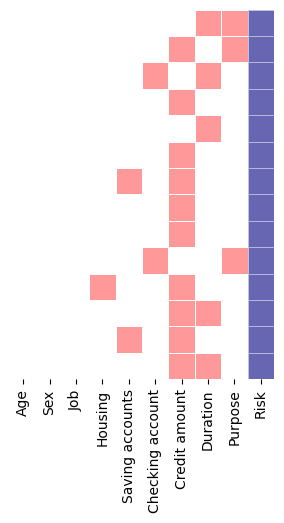

In [399]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Convert the boolean values (True, False) to integers (1, 0)
C = (gr_factual != gr_ce).astype(int)
D = (gr_factual != gr_ace).astype(int)

# Sample data: Assuming C is a DataFrame with 'Risk' as one of the columns
features_lists = C.drop(columns=['Risk'])
top_layer_df = C.copy()
top_layer_df.loc[:,top_layer_df.columns != 'Risk'] = 0

# Create the colormaps
cmap_top = ListedColormap(['white', 'red'])
cmap_bottom = ListedColormap(['white', '#000080'])

# Create a figure
# plt.figure(figsize=(8, 8))

# Plot the features_lists with one colormap (base heatmap)
sns.heatmap(features_lists, cmap=cmap_top, annot=False, cbar=False, square=True,linewidths=0.5)

# Overlay the target_list with a different colormap and transparent alpha layer
sns.heatmap(top_layer_df, cmap=cmap_bottom, annot=False, cbar=False, square=True, alpha=0.6,linewidths=0.5)

# Adjust the ticks
# plt.xticks([])  # Remove x ticks if necessary
plt.yticks([])  # Remove y ticks if necessary

# Show the plot
plt.show()

In [75]:
####################################################
index = [0,1,3,5,7,8,9,11,13,14,16,21,22,23,24,25,28,30,35,36,37]
gr_factual = factual_2.iloc[index].reset_index(drop=True)
gr_ace = ace_2.iloc[index].reset_index(drop=True)
gr_ce = ce_2.iloc[index].reset_index(drop=True)

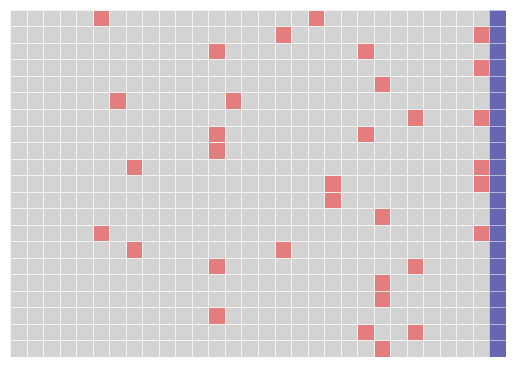

In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
"""
Plot the heatmap of corresponding counterfacutals
"""
# Convert the boolean values (True, False) to integers (1, 0)
C = (gr_factual != gr_ce).astype(int)
D = (gr_factual != gr_ace).astype(int)

# Sample data: Assuming C is a DataFrame with 'Risk' as one of the columns
features_lists = C.drop(columns=['is_canceled'])
top_layer_df = C.copy()
top_layer_df.loc[:,top_layer_df.columns != 'is_canceled'] = 0

# Create the colormaps
cmap_top = ListedColormap(['lightgrey', 'red'])
cmap_bottom = ListedColormap(['lightgrey', '#000080'])

# Create a figure
# plt.figure(figsize=(8, 8))

# Plot the features_lists with one colormap (base heatmap)
sns.heatmap(features_lists, cmap=cmap_top, annot=False, cbar=False, square=True,linewidths=0.5)

# Overlay the target_list with a different colormap and transparent alpha layer
sns.heatmap(top_layer_df, cmap=cmap_bottom, annot=False, cbar=False, square=True, alpha=0.6,linewidths=0.5)

# Adjust the ticks
plt.xticks([])  # Remove x ticks if necessary
plt.yticks([])  # Remove y ticks if necessary

# Show the plot
plt.show()

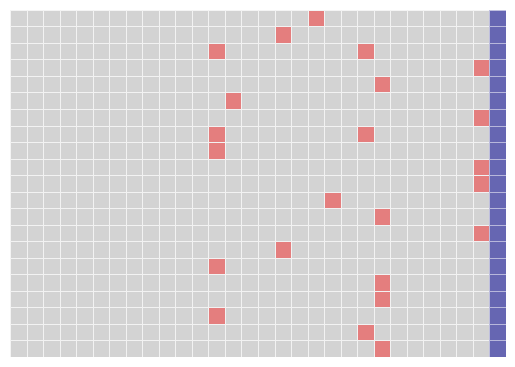

In [77]:
"""
Plot the heatmap of ace
"""
# Convert the boolean values (True, False) to integers (1, 0)
D = (gr_factual != gr_ace).astype(int)

# Sample data: Assuming C is a DataFrame with 'Risk' as one of the columns
features_lists = D.drop(columns=['is_canceled'])
top_layer_df = D.copy()
top_layer_df.loc[:,top_layer_df.columns != 'is_canceled'] = 0

# Create the colormaps
cmap_top = ListedColormap(['lightgrey', 'red'])
cmap_bottom = ListedColormap(['lightgrey', '#000080'])

# Create a figure
# plt.figure(figsize=(8, 8))

# Plot the features_lists with one colormap (base heatmap)
sns.heatmap(features_lists, cmap=cmap_top, annot=False, cbar=False, square=True,linewidths=0.5)

# Overlay the target_list with a different colormap and transparent alpha layer
sns.heatmap(top_layer_df, cmap=cmap_bottom, annot=False, cbar=False, square=True, alpha=0.6,linewidths=0.5)

# Adjust the ticks
plt.xticks([])  # Remove x ticks if necessary
plt.yticks([])  # Remove y ticks if necessary

# Show the plot
plt.show()